In [44]:
from astropy.io.votable import is_votable, parse
import numpy as np
from numpy.ma import getmask

In [2]:
fname = "master_field_galaxies.vot"

In [3]:
is_votable(fname)

True

In [4]:
table = parse(fname)
full  = table.get_first_table()
arr   = full.array

In [5]:
arr.dtype.names

('ID_Laigle_16',
 'RA',
 'DEC',
 'Z_MUSE',
 'CONFID',
 'Blend',
 'Defect',
 'Revisit',
 'ALPHA_J2000',
 'DELTA_J2000',
 'NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLAG_HJMCC',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'EBV',
 'FLAG_PETER',
 'FLAG_COSMOS',
 'FLAG_DEEP',
 'FLAG_SHALLOW',
 'Ks_FLUX_APER2',
 'Ks_FLUXERR_APER2',
 'Ks_FLUX_APER3',
 'Ks_FLUXERR_APER3',
 'Ks_MAG_APER2',
 'Ks_MAGERR_APER2',
 'Ks_MAG_APER3',
 'Ks_MAGERR_APER3',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'Ks_MAG_ISO',
 'Ks_MAGERR_ISO',
 'Ks_FLAGS',
 'Ks_IMAFLAGS_ISO',
 'Y_FLUX_APER2',
 'Y_FLUXERR_APER2',
 'Y_FLUX_APER3',
 'Y_FLUXERR_APER3',
 'Y_MAG_APER2',
 'Y_MAGERR_APER2',
 'Y_MAG_APER3',
 'Y_MAGERR_APER3',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'Y_MAG_ISO',
 'Y_MAGERR_ISO',
 'Y_FLAGS',
 'Y_IMAFLAGS_ISO',
 'H_FLUX_APER2',
 'H_FLUXERR_APER2',
 'H_FLUX_APER3',
 'H_FLUXERR_APER3',
 'H_MAG_APER2',
 'H_MAGERR_APER2',
 'H_MAG_APER3',
 'H_MAGERR_APER3',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'H_MAG_ISO'

In [87]:
fluxOII3726     = arr['OII_3726_FLUX']
fluxOII3726_err = arr['OII_3726_FLUX_ERR']
fluxOII3729     = arr['OII_3729_FLUX']
fluxOII3729_err = arr['OII_3729_FLUX_ERR']

fluxOII_err = (fluxOII3726_err + fluxOII3729_err)
fluxOII     = (fluxOII3726 + fluxOII3729)
maskFluxOII = np.logical_not(getmask(fluxOII))

FWHM_OII = arr['PSF_FWHM_o2']
maskFWHM = np.logical_not(getmask(FWHM_OII))

mass       = arr['lmass']
mass_lower = arr['l68_lmass']
mass_upper  = arr['u68_lmass']
maskMass   = np.logical_not(getmask(mass))

lsfr_lower = arr['l68_lsfr']
lsfr_upper  = arr['u68_lsfr']
lsfr       = arr['lsfr']
masklsfr   = np.logical_not(getmask(lsfr))

age_lower = arr['l68_lage']
age_upper  = arr['u68_lage']
age       = arr['lage']
maskAge   = np.logical_not(getmask(age))

#Applying masks to get rid of NaNs and so forth
if maskFluxOII.shape[0] <= masklsfr.shape[0]:
    #get the second mask to apply
    lsfr         = lsfr[maskFluxOII]
    tmp         = np.logical_not(getmask(lsfr))
    
    lsfr         = lsfr[tmp]
    lsfr_lower   = lsfr_lower[maskFluxOII][tmp]
    lsfr_upper   = lsfr_upper[maskFluxOII][tmp]
    fluxOII     = fluxOII[maskFluxOII][tmp]
    fluxOII_err = fluxOII_err[maskFluxOII][tmp]
else:
    fluxOII     = fluxOII[masklsfr]
    tmp         = np.logical_not(getmask(fluxOII))
    
    fluxOII     = fluxOII[tmp]
    fluxOII_err = fluxOII_err[masklsfr][tmp]
    lsfr         = lsfr[masklsfr][tmp]
    lsfr_lower   = lsfr_lower[masklsfr][tmp]
    lsfr_upper   = lsfr_upper[masklsfr][tmp]
    
lsfr

masked_array(data=[0.07999999821186066, -1.440000057220459,
                   -0.9200000166893005, -2.299999952316284,
                   -1.840000033378601, -0.8199999928474426,
                   -1.2999999523162842, 0.05999999865889549,
                   -0.4300000071525574, -1.399999976158142,
                   -1.0399999618530273, -0.8199999928474426,
                   0.8799999952316284, 0.23999999463558197,
                   -0.47999998927116394, -3.3499999046325684,
                   0.6100000143051147, 0.8799999952316284,
                   -0.6499999761581421, -0.3400000035762787,
                   -0.3199999928474426, 1.1699999570846558,
                   0.5799999833106995, -1.350000023841858,
                   -1.3899999856948853, 0.07000000029802322,
                   0.8199999928474426, 1.5299999713897705,
                   -0.30000001192092896, 0.46000000834465027,
                   -0.8600000143051147, 1.6699999570846558,
                   0.57999998331069

In [88]:
print("{:.3e}".format(fluxOII_err.max()))
print(lsfr.shape[0], lsfr_lower.shape[0])
lsfr.shape[0] == fluxOII.shape[0]

1.164e+10
487 487


True

In [89]:
sorting_indices = np.argsort(fluxOII_err)
fluxOII         = fluxOII[sorting_indices]
fluxOII_err     = fluxOII_err[sorting_indices]
lsfr             = lsfr[sorting_indices]
lsfr_lower       = lsfr_lower[sorting_indices]
lsfr_upper       = lsfr_upper[sorting_indices]

In [90]:
fluxOII_err[:-2]

masked_array(data=[33.15611267089844, 38.865264892578125,
                   43.034584045410156, 48.82284164428711,
                   49.007225036621094, 51.4515495300293,
                   52.519065856933594, 54.05207824707031,
                   54.310245513916016, 55.0392951965332,
                   55.444190979003906, 56.81886291503906,
                   57.70302963256836, 59.47040557861328,
                   59.82540512084961, 60.845542907714844,
                   60.87952423095703, 61.57798767089844,
                   61.61112976074219, 61.773380279541016,
                   61.87894821166992, 61.937904357910156,
                   61.95964050292969, 62.51670837402344,
                   62.658042907714844, 62.920127868652344,
                   63.068824768066406, 63.45168685913086,
                   63.617767333984375, 64.00117492675781,
                   65.24574279785156, 67.39878845214844, 67.5101318359375,
                   67.59471130371094, 67.994140625, 68.8517

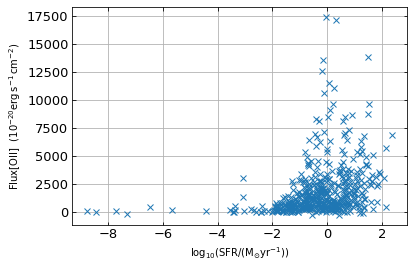

In [91]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

plt.ylabel(r"$\rm{Flux [OII]} \ \ (10^{-20} \rm{erg\, s^{-1} \,cm^{-2}})$")
plt.xlabel(r"$\log_{10}(\rm{SFR}/(M_{\odot} \rm{yr}^{-1}))$")

plt.plot(lsfr, fluxOII, "x")

<ErrorbarContainer object of 3 artists>

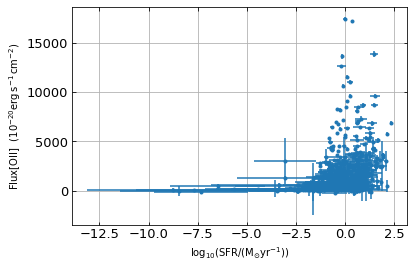

In [100]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

plt.ylabel(r"$\rm{Flux [OII]} \ \ (10^{-20} \rm{erg\, s^{-1} \,cm^{-2}})$")
plt.xlabel(r"$\log_{10}(\rm{SFR}/(M_{\odot} \rm{yr}^{-1}))$")

plt.errorbar(lsfr[:-2], fluxOII[:-2], xerr=(lsfr_upper[:-2]-lsfr_lower[:-2])/2.0, yerr=fluxOII_err[:-2], marker=".", linestyle='none')

In [93]:
sfr = 10**(lsfr)

In [94]:
sfr_lower = lsfr_lower*np.log(10)*np.abs(10**(lsfr))

In [95]:
sfr_upper = lsfr_upper*np.log(10)*np.abs(10**(lsfr))

<ErrorbarContainer object of 3 artists>

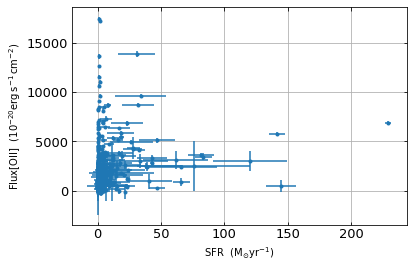

In [99]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

plt.ylabel(r"$\rm{Flux [OII]} \ \ (10^{-20} \rm{erg\, s^{-1} \,cm^{-2}})$")
plt.xlabel(r"$\rm{SFR} \ \ (M_{\odot} \rm{yr}^{-1})$")

plt.errorbar(sfr[:-2], fluxOII[:-2], xerr=(sfr_upper[:-2]-sfr_lower[:-2])/2.0, yerr=fluxOII_err[:-2], marker=".", linestyle='none')